# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   Link : https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?select=PS4_GamesSales.csv


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
import warnings
warnings.filterwarnings("ignore")


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [186]:
df = pd.read_csv('../PS4_GamesSales_raw.csv', encoding='latin1')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [187]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [189]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [190]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

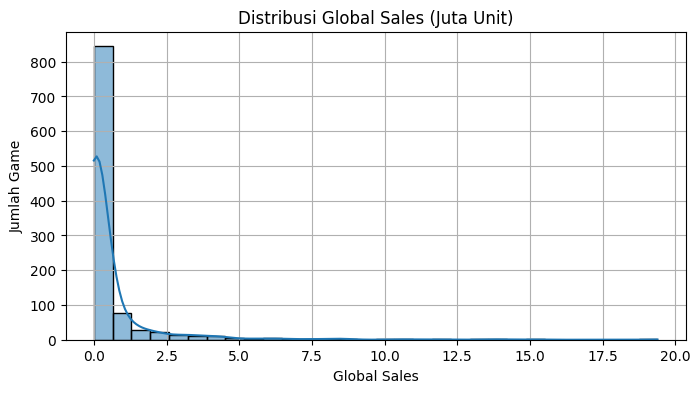

In [191]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Global'], bins=30, kde=True)
plt.title('Distribusi Global Sales (Juta Unit)')
plt.xlabel('Global Sales')
plt.ylabel('Jumlah Game')
plt.grid(True)
plt.show()

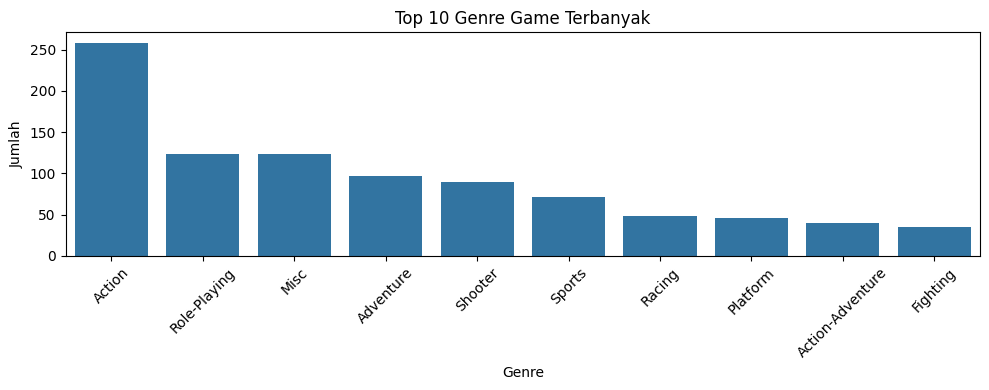

In [192]:
plt.figure(figsize=(10, 4))
top_genres = df['Genre'].value_counts().nlargest(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Genre Game Terbanyak')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

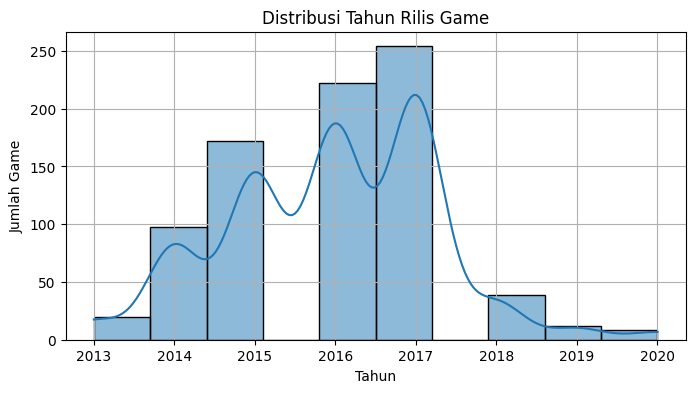

In [193]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Year'].dropna(), bins=10, kde=True)
plt.title('Distribusi Tahun Rilis Game')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')
plt.grid(True)
plt.show()

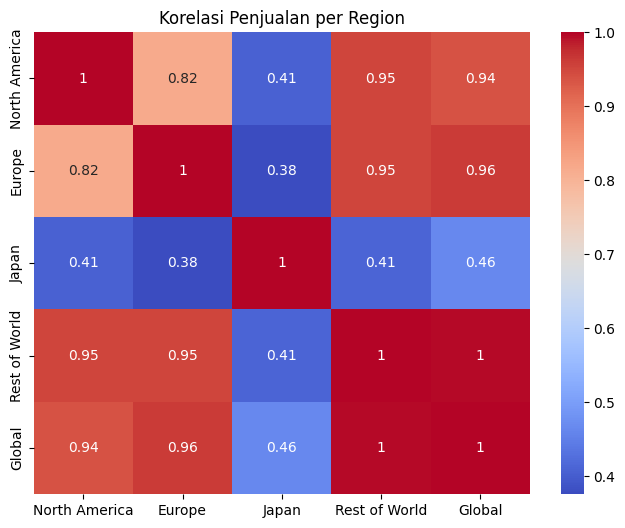

In [194]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Penjualan per Region')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [195]:
df['Year'].fillna(df['Year'].median(), inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)

In [196]:
df['Sales_Class'] = df['Global'].apply(lambda x: 1 if x >= 1.0 else 0)

In [197]:
le_genre = LabelEncoder()
le_publisher = LabelEncoder()

In [198]:
df['Genre'] = le_genre.fit_transform(df['Genre'])
df['Publisher'] = le_publisher.fit_transform(df['Publisher'])

In [199]:
features = ['Year', 'Genre', 'Publisher', 'North America', 'Europe', 'Japan', 'Rest of World']
X = df[features]
y = df['Sales_Class']

In [200]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Sales_Class
0,Grand Theft Auto V,2014.0,0,109,6.06,9.71,0.60,3.02,19.39,1
1,Call of Duty: Black Ops 3,2015.0,12,8,6.18,6.05,0.41,2.44,15.09,1
2,Red Dead Redemption 2,2018.0,1,109,5.26,6.21,0.21,2.26,13.94,1
3,Call of Duty: WWII,2017.0,12,8,4.67,6.21,0.40,2.12,13.40,1
4,FIFA 18,2017.0,14,41,1.27,8.64,0.15,1.73,11.80,1


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           1034 non-null   float64
 2   Genre          1034 non-null   int32  
 3   Publisher      1034 non-null   int32  
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
 9   Sales_Class    1034 non-null   int64  
dtypes: float64(6), int32(2), int64(1), object(1)
memory usage: 72.8+ KB


In [202]:
df.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Sales_Class      0
dtype: int64

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [204]:

output_dir = 'game_preprocessing'
modelling_dir = 'Membangun_model'
os.makedirs(output_dir, exist_ok=True)

train_df = X_train.copy()
train_df['Sales_Class'] = y_train.values
test_df = X_test.copy()
test_df['Sales_Class'] = y_test.values

train_df.to_csv(f'{output_dir}/train.csv', index=False)
test_df.to_csv(f'{output_dir}/test.csv', index=False)

# 7. Simpan encoder (untuk inference/deployment)
joblib.dump(le_genre, f'{output_dir}/le_genre.pkl')
joblib.dump(le_publisher, f'{output_dir}/le_publisher.pkl')

print("✅ Preprocessing Done. File disimpan di:", output_dir)

✅ Preprocessing Done. File disimpan di: game_preprocessing


*) Untuk Membangun_model di copy paste manual